In [12]:
import pandas as pd
import seaborn as sns
import numpy as np

In [13]:
pwd

'/content'

In [14]:
df = pd.read_csv('/Google_Stock_Price_Train.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [15]:
training = df['Open'].values
training =training.reshape(-1, 1)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
train_scaled = scale.fit_transform(training)


In [17]:
X_train=[]
y_train=[]

for i in range(60,len(train_scaled)):
    X_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])
X_train, y_train = np.array(X_train),np.array(y_train)


In [18]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [20]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer = 'adam',loss= 'mean_squared_error')

In [21]:
model.fit(X_train,y_train,epochs=100,batch_size=32)


Epoch 1/100
38/38 [==============================] - 10s 104ms/step - loss: 0.0990
Epoch 2/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0074
Epoch 3/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0060
Epoch 4/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0057
Epoch 5/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0058
Epoch 6/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0055
Epoch 8/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0048
Epoch 11/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0042
Epoch 13/100

In [22]:
test = pd.read_csv('/Google_Stock_Price_Test.csv')
testv = test['Open']
testv = testv.values

In [23]:
dataset = pd.concat((df['Open'],test['Open']),axis=0)
dataset.head()

0    325.25
1    331.27
2    329.83
3    328.34
4    322.04
Name: Open, dtype: float64

In [24]:
inputs = dataset[len(dataset)-len(test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = scale.transform(inputs)

X_test=[]

for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [25]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred = model.predict(X_test)

In [26]:
pred=scale.inverse_transform(pred)


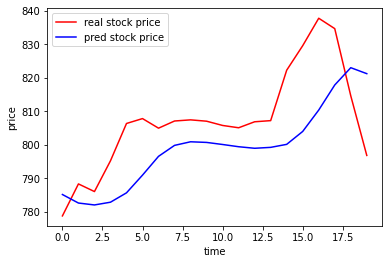

In [27]:
import matplotlib.pyplot as plt
plt.plot(testv,color='red',label='real stock price')
plt.plot(pred,color='blue',label='pred stock price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()